In [5]:
import pandas as pd

df = pd.read_csv('Datasets/nba_player_stats_2000_2024.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11659 entries, 0 to 11658
Data columns (total 67 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PLAYER_ID              11659 non-null  int64  
 1   PLAYER_NAME            11659 non-null  object 
 2   NICKNAME               11659 non-null  object 
 3   TEAM_ID                11659 non-null  int64  
 4   TEAM_ABBREVIATION      11659 non-null  object 
 5   AGE                    11659 non-null  float64
 6   GP                     11659 non-null  int64  
 7   W                      11659 non-null  int64  
 8   L                      11659 non-null  int64  
 9   W_PCT                  11659 non-null  float64
 10  MIN                    11659 non-null  float64
 11  FGM                    11659 non-null  float64
 12  FGA                    11659 non-null  float64
 13  FG_PCT                 11659 non-null  float64
 14  FG3M                   11659 non-null  float64
 15  FG

In [7]:
positions = pd.read_csv('nba_players_positions_2000_2024.csv')

df2 = pd.merge(df, positions[['Player', 'Pos']], left_on='PLAYER_NAME', right_on='Player', how='left', indicator=True)

In [8]:
positions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15158 entries, 0 to 15157
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Player  15158 non-null  object
 1   Pos     15158 non-null  object
 2   Season  15158 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 355.4+ KB


In [9]:
df2.drop_duplicates(subset=['Season', 'PLAYER_NAME'], inplace=True)

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11655 entries, 0 to 110328
Data columns (total 70 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   PLAYER_ID              11655 non-null  int64   
 1   PLAYER_NAME            11655 non-null  object  
 2   NICKNAME               11655 non-null  object  
 3   TEAM_ID                11655 non-null  int64   
 4   TEAM_ABBREVIATION      11655 non-null  object  
 5   AGE                    11655 non-null  float64 
 6   GP                     11655 non-null  int64   
 7   W                      11655 non-null  int64   
 8   L                      11655 non-null  int64   
 9   W_PCT                  11655 non-null  float64 
 10  MIN                    11655 non-null  float64 
 11  FGM                    11655 non-null  float64 
 12  FGA                    11655 non-null  float64 
 13  FG_PCT                 11655 non-null  float64 
 14  FG3M                   11655 non-null  flo

In [11]:
df2

,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,...,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,WNBA_FANTASY_PTS_RANK,Season,Player,Pos,_merge
0,920,A.C. Green,A.C.,1610612748,MIA,37.0,82,50,32,0.610,...,291,110,286,126,26,291,2000-01,A.C. Green,PF,both
2,2062,A.J. Guyton,A.J.,1610612741,CHI,23.0,33,6,27,0.182,...,223,413,282,224,26,272,2000-01,A.J. Guyton,PG,both
5,243,Aaron McKie,Aaron,1610612755,PHI,28.0,76,51,25,0.671,...,99,24,93,77,4,86,2000-01,Aaron McKie,SG,both
13,1425,Aaron Williams,Aaron,1610612751,NJN,29.0,82,26,56,0.317,...,115,418,97,53,26,100,2000-01,Aaron Williams,PF,both
26,228,Adam Keefe,Adam,1610612744,GSW,31.0,67,14,53,0.209,...,365,358,320,224,26,331,2000-01,Adam Keefe,C,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110309,203897,Zach LaVine,Zach,1610612741,CHI,29.0,25,10,15,0.400,...,56,494,70,190,38,60,2023-24,Zach LaVine,PG,both
110319,1630285,Zavier Simpson,Zavier,1610612763,MEM,27.0,7,1,6,0.143,...,300,507,231,257,38,244,2023-24,Zavier Simpson,PG,both
110321,1630192,Zeke Nnaji,Zeke,1610612743,DEN,23.0,58,41,17,0.707,...,445,462,410,257,38,426,2023-24,Zeke Nnaji,PF,both
110325,1630533,Ziaire Williams,Ziaire,1610612763,MEM,22.0,51,20,31,0.392,...,220,522,262,190,38,243,2023-24,Ziaire Williams,SF,both


In [12]:
X = df2.drop(['TEAM_ID', 'WNBA_FANTASY_PTS', 'WNBA_FANTASY_PTS_RANK', 'PLAYER_ID', 'NBA_FANTASY_PTS',
                      'MIN_RANK', 'L_RANK', 'W_RANK', 'W', 'L','PFD','PLUS_MINUS', 'DD2',
                      'W', 'L', 'W_PCT', 'Player', 'Season', 'NICKNAME', 'TEAM_ABBREVIATION', 'PLAYER_NAME', '_merge'],axis='columns')

X['FG_PCT'] = X['FG_PCT'] * 100
X['FG3_PCT'] = X['FG3_PCT'] * 100
X['FT_PCT'] = X['FT_PCT'] * 100

In [13]:
X.columns

Index(['AGE', 'GP', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT',
       'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL',
       'BLK', 'BLKA', 'PF', 'PTS', 'TD3', 'GP_RANK', 'W_PCT_RANK', 'FGM_RANK',
       'FGA_RANK', 'FG_PCT_RANK', 'FG3M_RANK', 'FG3A_RANK', 'FG3_PCT_RANK',
       'FTM_RANK', 'FTA_RANK', 'FT_PCT_RANK', 'OREB_RANK', 'DREB_RANK',
       'REB_RANK', 'AST_RANK', 'TOV_RANK', 'STL_RANK', 'BLK_RANK', 'BLKA_RANK',
       'PF_RANK', 'PFD_RANK', 'PTS_RANK', 'PLUS_MINUS_RANK',
       'NBA_FANTASY_PTS_RANK', 'DD2_RANK', 'TD3_RANK', 'Pos'],
      dtype='object')

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Cleaning the data
X['Pos'].value_counts()

Pos
PG       2272
SG       2254
PF       2157
SF       1987
C        1764
SF-PF      15
PG-SG      12
SG-SF      11
SG-PG       7
PF-SF       4
C-PF        4
SF-SG       3
Name: count, dtype: int64

In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming X is your DataFrame
# Dropping the rows with multiple positions
positions_to_drop = ['SF-PF', 'PG-SG', 'SG-SF', 'SG-PG', 'PF-SF', 'C-PF', 'SF-SG']
X = X[~X['Pos'].isin(positions_to_drop)]
X.dropna(subset=['Pos'], inplace=True)

X.columns


Index(['AGE', 'GP', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT',
       'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL',
       'BLK', 'BLKA', 'PF', 'PTS', 'TD3', 'GP_RANK', 'W_PCT_RANK', 'FGM_RANK',
       'FGA_RANK', 'FG_PCT_RANK', 'FG3M_RANK', 'FG3A_RANK', 'FG3_PCT_RANK',
       'FTM_RANK', 'FTA_RANK', 'FT_PCT_RANK', 'OREB_RANK', 'DREB_RANK',
       'REB_RANK', 'AST_RANK', 'TOV_RANK', 'STL_RANK', 'BLK_RANK', 'BLKA_RANK',
       'PF_RANK', 'PFD_RANK', 'PTS_RANK', 'PLUS_MINUS_RANK',
       'NBA_FANTASY_PTS_RANK', 'DD2_RANK', 'TD3_RANK', 'Pos'],
      dtype='object')

In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


# Encode the positions
le = LabelEncoder()
X['Pos'] = le.fit_transform(X['Pos'])

# Split the data into features and target variable
X_feature = X.drop(columns=['Pos'])
y = X['Pos']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_feature, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# List of models to evaluate
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=200),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "Support Vector Machine": SVC(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Hyperparameter tuning for Random Forest as an example
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random
random_search = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42), param_distributions=param_dist, n_iter=50, cv=3, n_jobs=-1, verbose=2, random_state=42)
random_search.fit(X_train, y_train)

# Get the best estimator
best_model = random_search.best_estimator_

# Make predictions on the test set with the best model
y_pred = best_model.predict(X_test)

# Convert encoded predictions back to original labels
y_pred_labels = le.inverse_transform(y_pred)
y_test_labels = le.inverse_transform(y_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Best Random Forest Accuracy: {accuracy}')
print('Best Random Forest Classification Report:')

# Get all unique classes from y_test and y_pred
unique_classes = np.unique(np.concatenate((y_test, y_pred)))

# Inverse transform the unique class labels
class_labels = le.inverse_transform(unique_classes)

# Convert class labels to strings
class_labels = [str(label) for label in class_labels]

# Create a classification report
print(classification_report(y_test, y_pred, target_names=class_labels))
    

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Random Forest Accuracy: 0.6214662194537613
Best Random Forest Classification Report:
              precision    recall  f1-score   support

           C       0.67      0.67      0.67       336
          PF       0.55      0.56      0.56       415
          PG       0.79      0.79      0.79       453
          SF       0.52      0.52      0.52       409
          SG       0.57      0.57      0.57       474

    accuracy                           0.62      2087
   macro avg       0.62      0.62      0.62      2087
weighted avg       0.62      0.62      0.62      2087



In [17]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Apply SMOTE to balance the classes in the training set
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Train the Random Forest model on the resampled training set
model = RandomForestClassifier(random_state=42)
model.fit(X_train_res, y_train_res)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Convert encoded predictions back to original labels
y_pred_labels = le.inverse_transform(y_pred)
y_test_labels = le.inverse_transform(y_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Random Forest with SMOTE Accuracy: {accuracy}')
print('Random Forest with SMOTE Classification Report:')

# Get all unique classes from y_test and y_pred
unique_classes = np.unique(np.concatenate((y_test, y_pred)))

# Inverse transform the unique class labels
class_labels = le.inverse_transform(unique_classes)

# Convert class labels to strings
class_labels = [str(label) for label in class_labels]

# Create a classification report
print(classification_report(y_test, y_pred, target_names=class_labels))


Random Forest with SMOTE Accuracy: 0.6142788691902252
Random Forest with SMOTE Classification Report:
              precision    recall  f1-score   support

           C       0.63      0.68      0.66       336
          PF       0.55      0.52      0.53       415
          PG       0.80      0.79      0.79       453
          SF       0.51      0.55      0.53       409
          SG       0.58      0.54      0.56       474

    accuracy                           0.61      2087
   macro avg       0.61      0.62      0.61      2087
weighted avg       0.61      0.61      0.61      2087



In [18]:
from xgboost import XGBClassifier

# Initialize and train the XGBoost Classifier
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_res, y_train_res)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Convert encoded predictions back to original labels
y_pred_labels_xgb = le.inverse_transform(y_pred_xgb)
y_test_labels_xgb = le.inverse_transform(y_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'XGBoost Accuracy: {accuracy_xgb}')
print('XGBoost Classification Report:')

# Get all unique classes from y_test and y_pred
unique_classes_xgb = np.unique(np.concatenate((y_test, y_pred_xgb)))

# Inverse transform the unique class labels
class_labels_xgb = le.inverse_transform(unique_classes_xgb)

# Convert class labels to strings
class_labels_xgb = [str(label) for label in class_labels_xgb]

# Create a classification report
print(classification_report(y_test, y_pred_xgb, target_names=class_labels_xgb))


XGBoost Accuracy: 0.612841399137518
XGBoost Classification Report:
              precision    recall  f1-score   support

           C       0.63      0.67      0.65       336
          PF       0.55      0.53      0.54       415
          PG       0.78      0.80      0.79       453
          SF       0.51      0.52      0.51       409
          SG       0.58      0.55      0.56       474

    accuracy                           0.61      2087
   macro avg       0.61      0.61      0.61      2087
weighted avg       0.61      0.61      0.61      2087



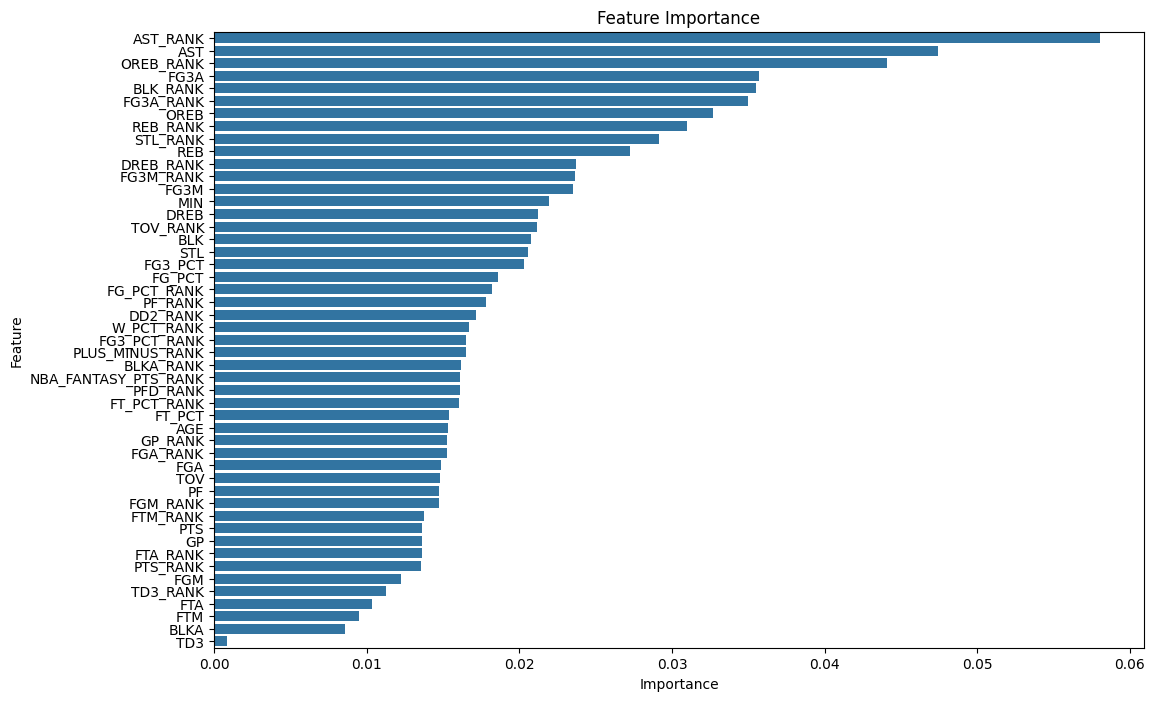

In [19]:
import matplotlib.pyplot as plt

import seaborn as sns
# Extract feature importances
importances = model.feature_importances_
feature_names = X_feature.columns

# Create a DataFrame for the feature importances
feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Adding new features to improve the accuracy of the model

In [20]:
# Adding more relevant features to the model
import pandas as pd
player_anthro = pd.read_csv('nba_draft_combine_anthro_2000_2024.csv')

In [21]:

player_anthro.drop(columns=['TEMP_PLAYER_ID', 'FIRST_NAME', 'LAST_NAME', 'POSITION', 
                            'HEIGHT_WO_SHOES', 'HEIGHT_W_SHOES', 'HEIGHT_W_SHOES_FT_IN',
                            'HEIGHT_W_SHOES_FT_IN', 'BODY_FAT_PCT', 'HAND_LENGTH', 'HAND_WIDTH' ], inplace=True)

In [22]:
player_anthro.head(10)

,PLAYER_ID,PLAYER_NAME,HEIGHT_WO_SHOES_FT_IN,WEIGHT,WINGSPAN,WINGSPAN_FT_IN,STANDING_REACH,STANDING_REACH_FT_IN,Season
0,2124,Malik Allen,6' 8.25'',271.0,86.50,7' 2.5'',109.0,9' 1'',2000-01
1,12019,Harold Arceneaux,6' 4.5'',219.0,80.50,6' 8.5'',103.0,8' 7'',2000-01
2,12020,Lamont Barnes,6' 8.5'',235.5,87.50,7' 3.5'',108.0,9' 0'',2000-01
3,12131,Mario Bland,6' 5.5'',287.0,84.00,7' 0'',103.0,8' 7'',2000-01
4,2056,Primoz Brezec,7' 0.75'',243.0,86.00,7' 2'',110.0,9' 2'',2000-01
5,2081,Ernest Brown,6' 10'',222.5,85.25,7' 1.25'',109.5,9' 1.5'',2000-01
6,2049,Speedy Claxton,5' 10.5'',166.0,72.00,6' 0'',94.5,7' 10.5'',2000-01
7,12132,Eric Coley,6' 4'',205.0,83.00,6' 11'',102.0,8' 6'',2000-01
8,12133,Ed Cota,6' 0.25'',189.0,76.00,6' 4'',96.5,8' 0.5'',2000-01
9,12134,Schea Cotton,6' 4.25'',219.5,79.00,6' 7'',100.0,8' 4'',2000-01


In [23]:
# Merge the player_anthro DataFrame with df2
X = pd.merge(df2, player_anthro, on=['PLAYER_NAME', 'Season'], how='left')


X.drop(['TEAM_ID', 'WNBA_FANTASY_PTS', 'WNBA_FANTASY_PTS_RANK', 'NBA_FANTASY_PTS',
                      'MIN_RANK', 'L_RANK', 'W_RANK', 'W', 'L','PFD','PLUS_MINUS', 'DD2',
                      'W', 'L', 'W_PCT', 'Player', 'Season', 'NICKNAME', 'TEAM_ABBREVIATION', 'PLAYER_NAME', '_merge'],axis='columns')

X['FG_PCT'] = X['FG_PCT'] * 100
X['FG3_PCT'] = X['FG3_PCT'] * 100
X['FT_PCT'] = X['FT_PCT'] * 100

positions_to_drop = ['SF-PF', 'PG-SG', 'SG-SF', 'SG-PG', 'PF-SF', 'C-PF', 'SF-SG']
X = X[~X['Pos'].isin(positions_to_drop)]
X.dropna(subset=['Pos'], inplace=True)

X.columns

Index(['PLAYER_ID_x', 'PLAYER_NAME', 'NICKNAME', 'TEAM_ID',
       'TEAM_ABBREVIATION', 'AGE', 'GP', 'W', 'L', 'W_PCT', 'MIN', 'FGM',
       'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT',
       'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD',
       'PTS', 'PLUS_MINUS', 'NBA_FANTASY_PTS', 'DD2', 'TD3',
       'WNBA_FANTASY_PTS', 'GP_RANK', 'W_RANK', 'L_RANK', 'W_PCT_RANK',
       'MIN_RANK', 'FGM_RANK', 'FGA_RANK', 'FG_PCT_RANK', 'FG3M_RANK',
       'FG3A_RANK', 'FG3_PCT_RANK', 'FTM_RANK', 'FTA_RANK', 'FT_PCT_RANK',
       'OREB_RANK', 'DREB_RANK', 'REB_RANK', 'AST_RANK', 'TOV_RANK',
       'STL_RANK', 'BLK_RANK', 'BLKA_RANK', 'PF_RANK', 'PFD_RANK', 'PTS_RANK',
       'PLUS_MINUS_RANK', 'NBA_FANTASY_PTS_RANK', 'DD2_RANK', 'TD3_RANK',
       'WNBA_FANTASY_PTS_RANK', 'Season', 'Player', 'Pos', '_merge',
       'PLAYER_ID_y', 'HEIGHT_WO_SHOES_FT_IN', 'WEIGHT', 'WINGSPAN',
       'WINGSPAN_FT_IN', 'STANDING_REACH', 'STANDING_REACH_FT_IN'],
     

In [24]:
X.columns

Index(['PLAYER_ID_x', 'PLAYER_NAME', 'NICKNAME', 'TEAM_ID',
       'TEAM_ABBREVIATION', 'AGE', 'GP', 'W', 'L', 'W_PCT', 'MIN', 'FGM',
       'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT',
       'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD',
       'PTS', 'PLUS_MINUS', 'NBA_FANTASY_PTS', 'DD2', 'TD3',
       'WNBA_FANTASY_PTS', 'GP_RANK', 'W_RANK', 'L_RANK', 'W_PCT_RANK',
       'MIN_RANK', 'FGM_RANK', 'FGA_RANK', 'FG_PCT_RANK', 'FG3M_RANK',
       'FG3A_RANK', 'FG3_PCT_RANK', 'FTM_RANK', 'FTA_RANK', 'FT_PCT_RANK',
       'OREB_RANK', 'DREB_RANK', 'REB_RANK', 'AST_RANK', 'TOV_RANK',
       'STL_RANK', 'BLK_RANK', 'BLKA_RANK', 'PF_RANK', 'PFD_RANK', 'PTS_RANK',
       'PLUS_MINUS_RANK', 'NBA_FANTASY_PTS_RANK', 'DD2_RANK', 'TD3_RANK',
       'WNBA_FANTASY_PTS_RANK', 'Season', 'Player', 'Pos', '_merge',
       'PLAYER_ID_y', 'HEIGHT_WO_SHOES_FT_IN', 'WEIGHT', 'WINGSPAN',
       'WINGSPAN_FT_IN', 'STANDING_REACH', 'STANDING_REACH_FT_IN'],
     

In [25]:
# Convert height from feet and inches to centimeters
X['HEIGHT_WO_SHOES_CM'] = X['HEIGHT_WO_SHOES_FT_IN'].apply(lambda x: float(x.split("'")[0]) * 30.48 + float(x.split("'")[1]) * 2.54 if isinstance(x, str) else x)

# Convert wingspan from feet and inches to centimeters
X['WINGSPAN_CM'] = X['WINGSPAN_FT_IN'].apply(lambda x: float(x.split("'")[0]) * 30.48 + float(x.split("'")[1]) * 2.54 if isinstance(x, str) else x)

# Convert standing reach from feet and inches to centimeters
X['STANDING_REACH_CM'] = X['STANDING_REACH_FT_IN'].apply(lambda x: float(x.split("'")[0]) * 30.48 + float(x.split("'")[1]) * 2.54 if isinstance(x, str) else x)

# Drop the original columns
X.drop(columns=['HEIGHT_WO_SHOES_FT_IN', 'WINGSPAN_FT_IN', 'STANDING_REACH_FT_IN', 'STANDING_REACH'], inplace=True)

In [26]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10434 entries, 0 to 11654
Data columns (total 76 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   PLAYER_ID_x            10434 non-null  int64   
 1   PLAYER_NAME            10434 non-null  object  
 2   NICKNAME               10434 non-null  object  
 3   TEAM_ID                10434 non-null  int64   
 4   TEAM_ABBREVIATION      10434 non-null  object  
 5   AGE                    10434 non-null  float64 
 6   GP                     10434 non-null  int64   
 7   W                      10434 non-null  int64   
 8   L                      10434 non-null  int64   
 9   W_PCT                  10434 non-null  float64 
 10  MIN                    10434 non-null  float64 
 11  FGM                    10434 non-null  float64 
 12  FGA                    10434 non-null  float64 
 13  FG_PCT                 10434 non-null  float64 
 14  FG3M                   10434 non-null  floa

In [27]:
X.dropna(inplace=True)

In [28]:
X.columns

Index(['PLAYER_ID_x', 'PLAYER_NAME', 'NICKNAME', 'TEAM_ID',
       'TEAM_ABBREVIATION', 'AGE', 'GP', 'W', 'L', 'W_PCT', 'MIN', 'FGM',
       'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT',
       'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD',
       'PTS', 'PLUS_MINUS', 'NBA_FANTASY_PTS', 'DD2', 'TD3',
       'WNBA_FANTASY_PTS', 'GP_RANK', 'W_RANK', 'L_RANK', 'W_PCT_RANK',
       'MIN_RANK', 'FGM_RANK', 'FGA_RANK', 'FG_PCT_RANK', 'FG3M_RANK',
       'FG3A_RANK', 'FG3_PCT_RANK', 'FTM_RANK', 'FTA_RANK', 'FT_PCT_RANK',
       'OREB_RANK', 'DREB_RANK', 'REB_RANK', 'AST_RANK', 'TOV_RANK',
       'STL_RANK', 'BLK_RANK', 'BLKA_RANK', 'PF_RANK', 'PFD_RANK', 'PTS_RANK',
       'PLUS_MINUS_RANK', 'NBA_FANTASY_PTS_RANK', 'DD2_RANK', 'TD3_RANK',
       'WNBA_FANTASY_PTS_RANK', 'Season', 'Player', 'Pos', '_merge',
       'PLAYER_ID_y', 'WEIGHT', 'WINGSPAN', 'HEIGHT_WO_SHOES_CM',
       'WINGSPAN_CM', 'STANDING_REACH_CM'],
      dtype='object')

In [29]:
# Dropping useless columns and feature that have low importance to the model
X.drop(['PLAYER_ID_x', 'PLAYER_NAME', 'NICKNAME', 'TEAM_ID','TEAM_ABBREVIATION','Player','PLAYER_ID_y', 'Season',
        '_merge', 'WINGSPAN','W', 'L', 'W_PCT', 'MIN', 'NBA_FANTASY_PTS', 'WNBA_FANTASY_PTS', 'PLUS_MINUS', 'AGE',
        'DD2', 'TD3','FG_PCT','BLKA','REB','FG3M', 'FTA', 'FTM'], axis=1, inplace=True)

X = X.loc[:, ~X.columns.str.contains('RANK')]

# Combine the positions with few samples into one category
X['Pos'] = X['Pos'].replace(['PF', 'SF'], 'PF-SF')

X.columns

Index(['GP', 'FGM', 'FGA', 'FG3A', 'FG3_PCT', 'FT_PCT', 'OREB', 'DREB', 'AST',
       'TOV', 'STL', 'BLK', 'PF', 'PFD', 'PTS', 'Pos', 'WEIGHT',
       'HEIGHT_WO_SHOES_CM', 'WINGSPAN_CM', 'STANDING_REACH_CM'],
      dtype='object')

Training Logistic Regression...
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best parameters for Logistic Regression: {'C': 1, 'penalty': 'l2'}
Best score for Logistic Regression: 0.7780638901328557

Training KNeighborsClassifier...
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best parameters for KNeighborsClassifier: {'n_neighbors': 7, 'weights': 'distance'}
Best score for KNeighborsClassifier: 0.7175324675324676

Training Support Vector Machine...
Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best parameters for Support Vector Machine: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best score for Support Vector Machine: 0.7852975568492809

Training Random Forest...
Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Best score for Random Forest: 0.772316763696074

Evaluating the best model: Logistic Regression


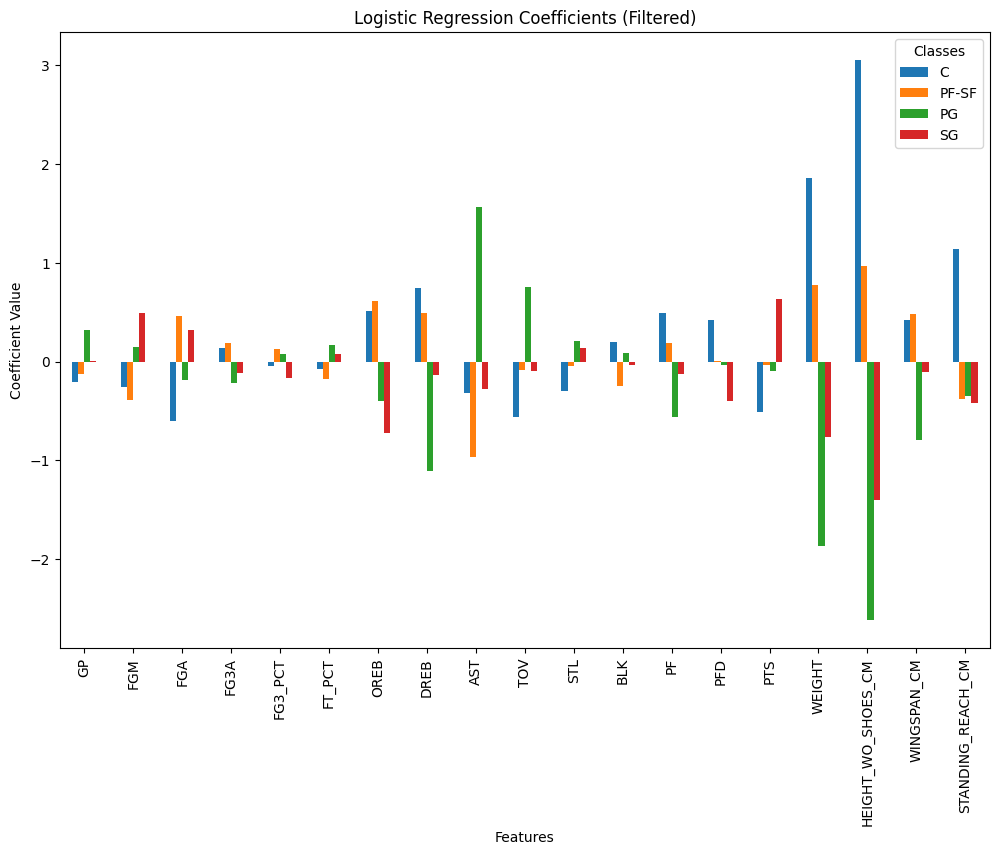

In [30]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV


# Encode the positions
le = LabelEncoder()
X['Pos'] = le.fit_transform(X['Pos'])

# Split the data into features and target variable
X_feature = X.drop(columns=['Pos'])
y = X['Pos']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_feature, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# List of models and their hyperparameters to evaluate
models = {
    "Logistic Regression": {
        "model": LogisticRegression(random_state=42, max_iter=200),
        "params": {
            "C": [0.1, 1, 10, 100],
            "penalty": ['l2']
        }
    },
    "KNeighborsClassifier": {
        "model": KNeighborsClassifier(),
        "params": {
            "n_neighbors": [3, 5, 7, 9],
            "weights": ['uniform', 'distance']
        }
    },
    "Support Vector Machine": {
        "model": SVC(random_state=42),
        "params": {
            "C": [0.1, 1, 10, 100],
            "gamma": [1, 0.1, 0.01, 0.001],
            "kernel": ['rbf', 'poly', 'sigmoid']
        }
    },
    "Random Forest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    }
}

best_estimators = {}
for model_name, model_info in models.items():
    print(f"Training {model_name}...")
    grid_search = GridSearchCV(estimator=model_info["model"], param_grid=model_info["params"], cv=3, n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)
    best_estimators[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best score for {model_name}: {grid_search.best_score_}\n")

# Evaluate the best model on the test set
best_model_name = max(best_estimators, key=lambda k: best_estimators[k].score(X_test, y_test))
best_model = best_estimators[best_model_name]

print(f"Evaluating the best model: {best_model_name}")
y_pred = best_model.predict(X_test)

# Convert encoded predictions back to original labels
y_pred_labels = le.inverse_transform(y_pred)
y_test_labels = le.inverse_transform(y_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Best Model Accuracy: {accuracy}')
print('Best Model Classification Report:')


# If the best model is Logistic Regression, display coefficients and remove least important ones
if isinstance(best_model, LogisticRegression):
    coefficients = pd.DataFrame(best_model.coef_.T, index=X_feature.columns, columns=le.classes_)
    
    # Set a threshold for importance
    threshold = 0
    
    # Filter out coefficients below the threshold
    coefficients_filtered = coefficients[(coefficients.abs() >= threshold).any(axis=1)]
    
    # Plot filtered coefficients
    coefficients_filtered.plot(kind='bar', figsize=(12, 8))
    plt.title('Logistic Regression Coefficients (Filtered)')
    plt.xlabel('Features')
    plt.ylabel('Coefficient Value')
    plt.legend(title='Classes')
    plt.show()

In [31]:
# If the best model is SVC, use permutation importance
if isinstance(best_model, SVC):
    result = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)
    
    # Plot permutation importance
    perm_importances = result.importances_mean
    feature_names = X_feature.columns

    feature_importances = pd.DataFrame({
        'Feature': feature_names,
        'Importance': perm_importances
    })

    # Sort the DataFrame by importance
    feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

    # Plot the feature importances
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importances)
    plt.title('Permutation Importance')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()
elif hasattr(best_model, 'feature_importances_'):
    importances = best_model.feature_importances_
    feature_names = X_feature.columns

    # Check if lengths match
    if len(importances) == len(feature_names):
        # Create a DataFrame for the feature importances
        feature_importances = pd.DataFrame({
            'Feature': feature_names,
            'Importance': importances
        })

        # Sort the DataFrame by importance
        feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

        # Plot the feature importances
        plt.figure(figsize=(12, 8))
        sns.barplot(x='Importance', y='Feature', data=feature_importances)
        plt.title('Feature Importance')
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.show()
    else:
        print("The length of importances does not match the length of feature names.")
else:
    print(f"Feature importances are not available for the model: {type(best_model).__name__}")


Feature importances are not available for the model: LogisticRegression


In [32]:
def predict_position_with_user_input(**user_input):
    """
    Predict the position based on user input.

    Parameters:
    user_input (dict): A dictionary where keys are feature names and values are the feature values provided by the user.

    Returns:
    predicted_pos (str): The predicted position label.
    """
    # Ensure the input data is a DataFrame
    input_data = pd.DataFrame([user_input])
    
    # Ensure all important features are in the user input
    missing_features = set(coefficients_filtered.index) - set(input_data.columns)
    if missing_features:
        raise ValueError(f"The following important features are missing from the user input: {missing_features}")
    
    # Filter input data to include only important features
    input_data = input_data[coefficients_filtered.index]
    
    # Scale the input data
    input_data_scaled = scaler.transform(input_data)
    
    # Predict the position
    predicted_pos_encoded = best_model.predict(input_data_scaled)
    predicted_pos = le.inverse_transform(predicted_pos_encoded)
    
    return predicted_pos[0]



In [33]:
predict_position_with_user_input(GP=82, FGM=5, FGA=12, FG3A=3, FG3_PCT=0.3, FT_PCT=0.8, OREB=3, DREB=5, AST=3, TOV=3, STL=2,
                                 BLK=5, PF=4, PFD=2, PTS=20, WEIGHT=210, HEIGHT_WO_SHOES_CM=210, WINGSPAN_CM=230, STANDING_REACH_CM=270)

'C'

In [36]:
# save the model as a pickle file
import pickle
with open('Flask Server Position/server/artifacts/NBA_Position_classification.pickle','wb') as f:
    pickle.dump(best_model,f)
    

# Save the columns the model was trained on
import json
columns = {
    'data_columns' : [col.lower() for col in X_feature.columns]
}
with open("Flask Server Position/server/artifacts/pos_columns.json","w") as f:
    f.write(json.dumps(columns))
    
    
# Save the scaler as a pickle file
with open('Flask Server Position/server/artifacts/pos_scaler.pickle','wb') as f:
    pickle.dump(scaler,f)
    
# Save the label encoder as a pickle file
with open('Flask Server Position/server/artifacts/pos_label_encoder.pickle','wb') as f:
    pickle.dump(le,f)